In [31]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


# Batch processing for muliple folders within a directory is added
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import time
import scipy.io as io
import os
from os import listdir
import glob
import time
from scipy import ndimage as ndi
from skimage.morphology import binary_closing, binary_opening, binary_dilation, disk,remove_small_objects,label
from skimage.morphology import remove_small_holes, binary_erosion
from skimage.measure import label, regionprops
import csv
from skimage import io

rootDir = r'Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten'
plateName = 'Mavacamten'

outputFolder = r'Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect'


imageNameRoot =  rootDir  + "\\*_auto_annotated.tif"


imageNames = sorted(glob.glob(imageNameRoot))

# Set output the csv file 
csvOutputName = outputFolder+"\\"+ "cardiomyocytes_boxes_selected.csv"
print(csvOutputName)

for imageName in imageNames:
    print('imageName (FULL): ' + imageName)
    (dirName,fileName) = os.path.split(imageName)

    print('fileName: ' + fileName)
    view_label = plateName + "_" + fileName.split('_')[0]
    print('view_label: ' + view_label)
    ###img0 = cv2.imread(imageName)
    img1 = io.imread(imageName)
    ###print(img1)
    cellMask1 = (img1[:,:,0]>200)
    ###cellMask2 = ndi.binary_fill_holes(cellMask1)
    cellMask2 =  remove_small_objects(cellMask1,10)
    cellMask3 = binary_opening(cellMask2,disk(2))
    cellLabel = label(cellMask3)
    features = regionprops(cellLabel)
    
    
    ### Set output the csv file 
    ###csvOutputName = subfolder+"\\"+ "cardiomyocytes_boxes.csv"
    ###print(csvOutputName)

    fout = open(csvOutputName, 'a', newline='')

    writer = csv.writer(fout)
    
    fout.flush() 
        
    for ff in features:
        print(ff.bbox)
        writer.writerow((view_label,ff.bbox[0],ff.bbox[1],ff.bbox[2],ff.bbox[3]))
            
        fout.flush()
    fout.close()
    
    




Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\cardiomyocytes_boxes_selected.csv
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s01_frame_001_auto_annotated.tif
fileName: s01_frame_001_auto_annotated.tif
view_label: Mavacamten_s01
(544, 651, 551, 658)
(591, 110, 598, 117)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s02_frame_001_auto_annotated.tif
fileName: s02_frame_001_auto_annotated.tif
view_label: Mavacamten_s02
(694, 344, 701, 351)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s03_frame_001_auto_annotated.tif
fileName: s03_frame_001_auto_annotated.tif
view_label: Mavacamten_s03
(92, 438, 99, 445)
(401, 790, 408, 797)
(923, 863, 930, 870)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s04_frame_001_auto_annotated.tif
fileName: s04_frame_001_

(182, 886, 189, 893)
(274, 198, 281, 205)
(433, 840, 440, 847)
(694, 757, 701, 764)
(794, 558, 801, 565)
(825, 697, 832, 704)
(856, 869, 863, 876)
(864, 793, 871, 800)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s28_frame_001_auto_annotated.tif
fileName: s28_frame_001_auto_annotated.tif
view_label: Mavacamten_s28
(105, 177, 112, 184)
(108, 614, 115, 621)
(393, 603, 400, 610)
(441, 647, 448, 654)
(484, 610, 491, 617)
(941, 409, 948, 416)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s29_frame_001_auto_annotated.tif
fileName: s29_frame_001_auto_annotated.tif
view_label: Mavacamten_s29
(237, 735, 244, 742)
(448, 720, 455, 727)
(763, 744, 770, 751)
imageName (FULL): Z:\pangj05\TROPONIN2021\20210616DataSetAnalysis\Pairwise\Shoh_ManSelect\Mavacamten\s30_frame_001_auto_annotated.tif
fileName: s30_frame_001_auto_annotated.tif
view_label: Mavacamten_s30
(113, 27, 120, 34)
(221, 136, 2

In [19]:
print(features[1])

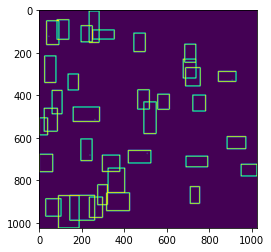

In [8]:
plt.imshow(img1[:,:,2])

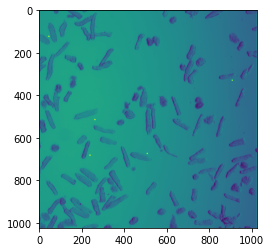

In [9]:
plt.imshow(img1[:,:,0])

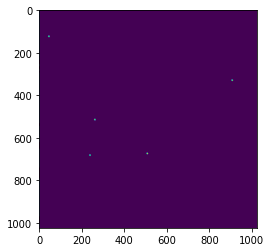

In [12]:
plt.imshow(img1[:,:,0]>200)